In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import code
import time

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, Flatten, MaxPooling1D
from keras import optimizers
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

from numpy import mean
from numpy import std

#following: https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [11]:
seed = 42
train = 'data.csv';
dataframe = pd.read_csv(train, header=0) ;
X = dataframe.iloc[:, 1:141];
y = dataframe.iloc[:, 0];

def split(X, y):
    train_size = 0.8
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed)
    return X_train, X_test, y_train, y_test

x_train, x_test, y_train, y_test = split(X, y)
# Reshaping the array to 3-dims so that it can work with the Keras API
x_train = x_train.values.reshape(x_train.shape[0], 140, 1)
x_test = x_test.values.reshape(x_test.shape[0], 140, 1)
X = X.values.reshape(X.shape[0], 140, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
X = X.astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)

print('x_train shape:', x_train.shape)
print('Number of segments in x_train', x_train.shape[0])
print('Number of segments in x_test', x_test.shape[0])

print(y_train)

# Creating a Sequential Model and adding the layers

x_train shape: (25544, 140, 1)
Number of segments in x_train 25544
Number of segments in x_test 6387
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], 1, 2
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    oldtime = time.time()
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    print("training time:")
    print(time.time()-oldtime)
    # evaluate model
    oldtime = time.time()
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    print("testing time:")
    print(time.time()-oldtime)
    return accuracy

# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [13]:
scores = list()
for r in range(1):
    score = evaluate_model(x_train, y_train, X, y)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
# summarize results
summarize_results(scores)

Epoch 1/10
25544/25544 [==============================] - 35s 1ms/step - loss: 0.4013 - acc: 0.8122
Epoch 2/10
25544/25544 [==============================] - 34s 1ms/step - loss: 0.3647 - acc: 0.8318
Epoch 3/10
25544/25544 [==============================] - 34s 1ms/step - loss: 0.3487 - acc: 0.8411
Epoch 4/10
25544/25544 [==============================] - 34s 1ms/step - loss: 0.3411 - acc: 0.8463
Epoch 5/10
25544/25544 [==============================] - 34s 1ms/step - loss: 0.3323 - acc: 0.8487
Epoch 6/10
25544/25544 [==============================] - 34s 1ms/step - loss: 0.3241 - acc: 0.8540
Epoch 7/10
25544/25544 [==============================] - 35s 1ms/step - loss: 0.3192 - acc: 0.8590
Epoch 8/10
25544/25544 [==============================] - 37s 1ms/step - loss: 0.3131 - acc: 0.8605
Epoch 9/10
25544/25544 [==============================] - 38s 1ms/step - loss: 0.3086 - acc: 0.8632
Epoch 10/10
25544/25544 [==============================] - 39s 2ms/step - loss: 0.3033 - acc: 0.8677

In [5]:
def modelplt(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], 1, 2
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names=True)
    
modelplt(x_train, y_train, x_test, y_test)

In [5]:
#Compile the model
keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1 = model1.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), batch_size = 10000, epochs=10)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2 = model2.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), batch_size = 10000, epochs=10)

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history3 = model3.fit(x=x_train,y=y_train, validation_data=(x_test,y_test), batch_size = 10000, epochs=10)

#code.interact(local=locals())

Train on 47999 samples, validate on 12000 samples
Epoch 1/10
47999/47999 [==============================] - 125s 3ms/step - loss: 2.3005 - acc: 0.1306 - val_loss: 2.2967 - val_acc: 0.1096
Epoch 2/10
47999/47999 [==============================] - 82s 2ms/step - loss: 2.2899 - acc: 0.1137 - val_loss: 2.2759 - val_acc: 0.1234
Epoch 3/10
47999/47999 [==============================] - 86s 2ms/step - loss: 2.2558 - acc: 0.2833 - val_loss: 2.2145 - val_acc: 0.3383
Epoch 4/10
47999/47999 [==============================] - 86s 2ms/step - loss: 2.1663 - acc: 0.5059 - val_loss: 2.0733 - val_acc: 0.5547
Epoch 5/10
47999/47999 [==============================] - 79s 2ms/step - loss: 1.9827 - acc: 0.5578 - val_loss: 1.8207 - val_acc: 0.6515
Epoch 6/10
47999/47999 [==============================] - 76s 2ms/step - loss: 1.6849 - acc: 0.6476 - val_loss: 1.4649 - val_acc: 0.6768
Epoch 7/10
47999/47999 [==============================] - 81s 2ms/step - loss: 1.3145 - acc: 0.7022 - val_loss: 1.0898 - val_ac

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


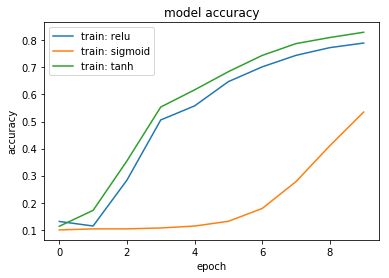

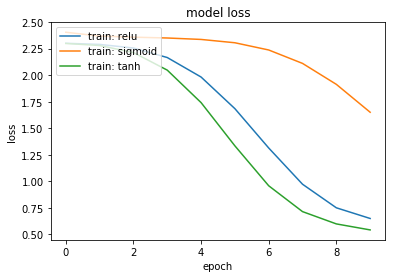

The mean squared error (MSE) for relu test data set is: [0.6048902721007665, 0.8018333333333333]
The mean squared error (MSE) for sigmoid test data set is: [1.4288971872329712, 0.7085]
The mean squared error (MSE) for tanh test data set is: [0.5319500441948573, 0.8375833333333333]
Test_Data shape: (9999, 28, 28, 1)
Number of images in  9999


In [35]:
print(history1.history.keys())
#  "Accuracy"
plt.plot(history1.history['acc'])
# plt.plot(history1.history['val_acc'])
plt.plot(history2.history['acc'])
# plt.plot(history2.history['val_acc'])
plt.plot(history3.history['acc'])
# plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train: relu', 'train: sigmoid', 'train: tanh'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
# plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
# plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train: relu', 'train: sigmoid', 'train: tanh'], loc='upper left')
plt.show()
test_error_rate = model1.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for relu test data set is: {}".format(test_error_rate))
test_error_rate = model2.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for sigmoid test data set is: {}".format(test_error_rate))
test_error_rate = model3.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for tanh test data set is: {}".format(test_error_rate))

# model.save("trained_model_P3.h5")
test_data = pd.read_csv('mnist_test.csv')
Test_Data = test_data.iloc[:, 1:];
Test_Labels = test_data.iloc[:, 0];
# Reshaping the array to 4-dims so that it can work with the Keras API
Test_Data = Test_Data.values.reshape(Test_Data.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
Test_Data = Test_Data.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
Test_Data /= 255
print('Test_Data shape:', Test_Data.shape)
print('Number of images in ', Test_Data.shape[0])

In [38]:
# model = keras.models.load_model("trained_model_P3.h5")
predictions = model1.predict(Test_Data)
count = 0
# Sub = np.subtract(predictions,Test_Labels)
for i in range(0,9999):
    coridx = Test_Labels[i]
    AA = predictions[i,coridx]
    if AA> 0.7:
        count = count +1


Test_Accuracy = 1 - count/10000.
print(Test_Accuracy)

0.5494


In [39]:
# model = keras.models.load_model("trained_model_P3.h5")
predictions = model2.predict(Test_Data)
count = 0
# Sub = np.subtract(predictions,Test_Labels)
for i in range(0,9999):
    coridx = Test_Labels[i]
    AA = predictions[i,coridx]
    if AA> 0.7:
        count = count +1


Test_Accuracy = 1 - count/10000.
print(Test_Accuracy)

0.8085


In [40]:
# model = keras.models.load_model("trained_model_P3.h5")
predictions = model3.predict(Test_Data)
count = 0
# Sub = np.subtract(predictions,Test_Labels)
for i in range(0,9999):
    coridx = Test_Labels[i]
    AA = predictions[i,coridx]
    if AA> 0.7:
        count = count +1


Test_Accuracy = 1 - count/10000.
print(Test_Accuracy)

0.44920000000000004


In [25]:
print(Test_Labels[0])

2


In [14]:
print(Test_Data)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.